### Name: Thomas Saltos
### Exercise 2

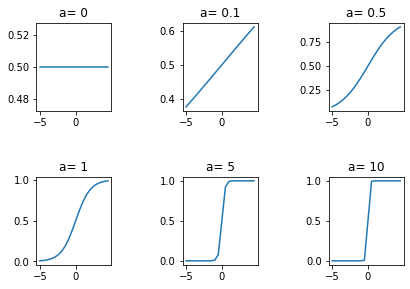

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(z,a):
    return 1/(1+ np.exp(-a*z))

z = np.arange(-5.0,5.0,0.5)
a =[0,0.1,0.5,1,5,10]
fig = plt.figure()

plt.subplot(231)
plt.plot(z, f(z,a[0]))
plt.title('a= %s' %a[0])

plt.subplot(232)
plt.plot(z, f(z,a[1]))
plt.title('a= %s' %a[1])

plt.subplot(233)
plt.plot(z, f(z,a[2]))
plt.title('a= %s' %a[2])

plt.subplot(234)
plt.plot(z, f(z,a[3]))
plt.title('a= %s' %a[3])

plt.subplot(235)
plt.plot(z, f(z,a[4]))
plt.title('a= %s' %a[4])

plt.subplot(236)
plt.plot(z, f(z,a[5]))
plt.title('a= %s' %a[5])

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.95)
plt.show()

### Exercise 4

In [5]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
import pandas as pd
from numpy import matlib

Dataset = sio.loadmat('HW8.mat')
train_x = Dataset['train_x']
train_y= Dataset['train_y']

test_x = Dataset['test_x']
test_y = Dataset['test_y']

In [2]:
indx_1 = (train_y==1).reshape(len(train_y))
indx_2 = (train_y==2).reshape(len(train_y))

### a) Bayes classifier

In [3]:
#estimate number of trainining samples belonging to each class
N1 = np.count_nonzero(indx_1)
N2 = np.count_nonzero(indx_2)
N = len(train_y)
P1 = N1/N
P2 = N2/N
name1 = ["$P_{\omega_1}$","$P_{\omega_2}$"]
pd.DataFrame([P1,P2],name1,[""])

,
$P_{\omega_1}$,0.5
$P_{\omega_2}$,0.5


In [6]:
m1 = np.mean(train_x[indx_1,:],0)
m2 = np.mean(train_x[indx_2,:],0)
S1 = 1/N1*((train_x[indx_1,:] - np.matlib.repmat(m1,N1,1)).T).dot((train_x[indx_1,:] - np.matlib.repmat(m1,N1,1)))
S2 = 1/N2*((train_x[indx_2,:] - np.matlib.repmat(m2,N2,1)).T).dot((train_x[indx_2,:] - np.matlib.repmat(m2,N2,1)))

N_test = len(test_y)
class1 = multivariate_normal(m1,S1)
class1_scores = class1.pdf(test_x)*P1
class2 = multivariate_normal(m2,S2)
class2_scores = class2.pdf(test_x)*P2
Btest_y = np.zeros((N,1))
Btest_y[class1_scores>class2_scores] = 1
Btest_y[class2_scores>class1_scores] = 2

Error_Bayes = 1 - (np.sum(i==1 for i in Btest_y == test_y))/N_test
name1 = ["Error of Bayes classifier"]
pd.DataFrame(Error_Bayes,name1,[""])

c:\users\thomas\envs\notebook\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app


,
Error of Bayes classifier,0.15


### b) Naive Bayes classifier

In [7]:
m1 = np.mean(train_x[indx_1,:],0)
m2 = np.mean(train_x[indx_2,:],0)
#ML estimate of S11, S12
S11_naive = np.sum(np.power(train_x[indx_1,0].reshape(N1,1) - np.matlib.repmat(m1[0],N1,1),2))/N1
S12_naive = (np.sum(np.power(train_x[indx_1,1].reshape(N1,1) - np.matlib.repmat(m1[1],N1,1),2)))/N1
#ML estimate of S21,S22
S21_naive = np.sum(np.power(train_x[indx_2,0].reshape(N2,1) - np.matlib.repmat(m2[0],N2,1),2))/N2
S22_naive = np.sum(np.power(train_x[indx_2,1].reshape(N2,1) - np.matlib.repmat(m2[1],N2,1),2))/N2
class1_scores = np.multiply(norm(m1[0],np.sqrt(S11_naive)).pdf(test_x[:,0]), (norm(m1[1],np.sqrt(S12_naive)).pdf(test_x[:,1])))
class2_scores= np.multiply(norm(m2[0],np.sqrt(S21_naive)).pdf(test_x[:,0]), norm(m2[1],np.sqrt(S22_naive)).pdf(test_x[:,1]))

Btest_naive_y = np.zeros((N,1))
Btest_naive_y[class1_scores>class2_scores] = 1
Btest_naive_y[class2_scores>class1_scores] = 2

Error_Bayes_naive = (np.sum(i==1 for i in Btest_naive_y != test_y))/N_test
name1 = ["Error of Naive Bayes classifier"]
pd.DataFrame(Error_Bayes_naive,name1,[""])

c:\users\thomas\envs\notebook\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  app.launch_new_instance()


,
Error of Naive Bayes classifier,0.165


### c) knn classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_x, train_y.ravel())
Knn_test_y = neigh.predict(test_x).reshape(N_test,1)
Error_kNN = (np.sum(i==1 for i in Knn_test_y != test_y))/N_test
name1 = ["Error of kNN classifier"]
pd.DataFrame(Error_kNN,name1,[""])

c:\users\thomas\envs\notebook\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


,
Error of kNN classifier,0.17


### d) Logistic-regression classifier

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_x, train_y.ravel())
lr_test_y = clf.predict(test_x).reshape(N_test,1)
Error_logR = (np.sum(i==1 for i in lr_test_y != test_y))/N_test
name1 = ["Error of Logistic Regression classifier"]
pd.DataFrame(Error_logR,name1,[""])

c:\users\thomas\envs\notebook\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


,
Error of Logistic Regression classifier,0.155


### e)

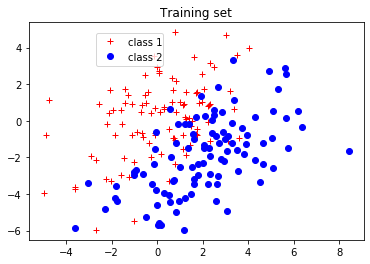

In [10]:
plt.plot(train_x[indx_1,0],train_x[indx_1,1],'r+',label='class 1')
plt.plot(train_x[indx_2,0],train_x[indx_2,1],'bo',label='class 2')
plt.title('Training set')
plt.legend(bbox_to_anchor=(0.2, .8, .2, .2), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.show()

### f) Classification results on the test set

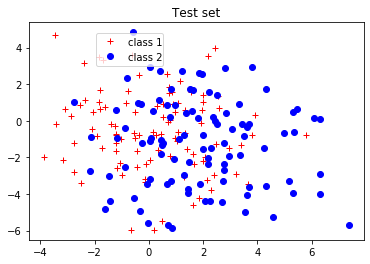

In [11]:
plt.plot(test_x[(test_y==1).reshape(len(test_y)),0],
train_x[(test_y==1).reshape(len(test_y)),1],'r+',label='class 1')
plt.plot(test_x[(test_y==2).reshape(len(test_y)),0],
train_x[(test_y==2).reshape(len(test_y)),1],'bo',label='class 2')
plt.title('Test set')
plt.legend(bbox_to_anchor=(0.2, .8, .2, .2), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.show()

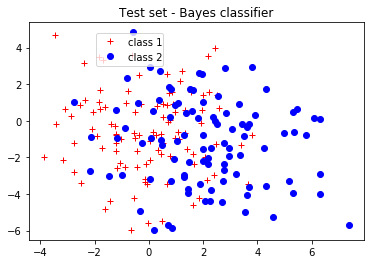

In [12]:
plt.plot(test_x[(Btest_y==1).reshape(len(test_y)),0],
train_x[(Btest_y==1).reshape(len(test_y)),1],'r+',label='class 1')
plt.plot(test_x[(Btest_y==2).reshape(len(test_y)),0],
train_x[(Btest_y==2).reshape(len(test_y)),1],'bo',label='class 2')
plt.title('Test set - Bayes classifier')
plt.legend(bbox_to_anchor=(0.2, .8, .2, .2), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.show()

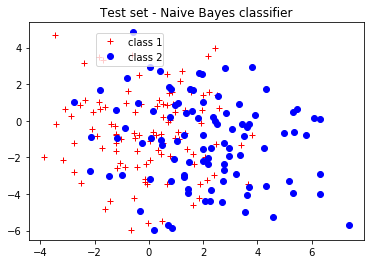

In [13]:
plt.plot(test_x[(Btest_naive_y==1).reshape(len(test_y)),0],
train_x[(Btest_naive_y==1).reshape(len(test_y)),1],'r+',label='class 1')
plt.plot(test_x[(Btest_naive_y==2).reshape(len(test_y)),0],
train_x[(Btest_naive_y==2).reshape(len(test_y)),1],'bo',label='class 2')
plt.title('Test set - Naive Bayes classifier')
plt.legend(bbox_to_anchor=(0.2, .8, .2, .2), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.show()

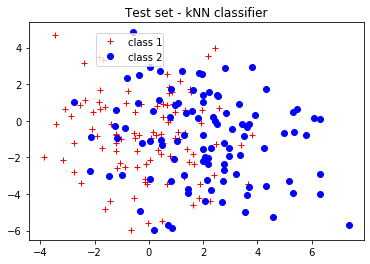

In [14]:
plt.plot(test_x[(Knn_test_y==1).reshape(len(test_y)),0],
train_x[(Knn_test_y==1).reshape(len(test_y)),1],'r+',label='class 1')
plt.plot(test_x[(Knn_test_y==2).reshape(len(test_y)),0],
train_x[(Knn_test_y==2).reshape(len(test_y)),1],'bo',label='class 2')
plt.title('Test set - kNN classifier')
plt.legend(bbox_to_anchor=(0.2, .8, .2, .2), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.show()

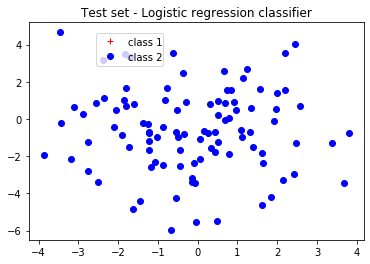

In [17]:
plt.plot(test_x[(lr_test_y==0).reshape(len(test_y)),0],
train_x[(lr_test_y==0).reshape(len(test_y)),1],'r+',label='class 1')
plt.plot(test_x[(lr_test_y==1).reshape(len(test_y)),0],
train_x[(lr_test_y==1).reshape(len(test_y)),1],'bo',label='class 2')
plt.title('Test set - Logistic regression classifier')
plt.legend(bbox_to_anchor=(0.2, .8, .2, .2), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.show()

It can be seen from the results obtained on the test set that the Bayes classifier outperforms
the rest classifiers. More specifically, Bayes classifier is superior to the Naive Bayes since the two
classes are characterized by a non-diagonal covariance matrix. Hence, the statistical independence
assumption (in the normal distribution case statistical independence is equivalent to a diagonal
covariance matrix) which is the fundamental hypothesis made by the Naive Bayes is not valid. It
is worth noting however that, despite the fact that the independence assumption 1 under which
the naive Bayes and the minimum Euclidean distance classifiers are optimal is violated, the results
obtained by both of them are only slightly worse than those of the Bayes classifier. Bayes classifier
would exhibit the same performance with Naive Bayes if) the covariance matrices of normal
distribution that generated the samples of the two classes was diagonal.
It should be also noted that the results obtained by Logistic regression on the test set are quite
close to the ones obtained by the Bayes classifier who is optimal. Taking into account the fact that
the Logistic regression is based on the assumption that the two classes are linearly separable, there
is a strong indication that this assumption is valid for this case. This is also verified by a visual
inspection of the classes.